In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

import zipfile

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmaod 600 ~/.kaggle/kaggle.json

! kaggle datasets download imetomi/eur-usd-forex-pair-historical-data-2002-2019 

with zipfile.ZipFile("/content/eur-usd-forex-pair-historical-data-2002-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

df = pd.read_csv('eurusd_minute.csv',index_col=0,parse_dates=True)
#rimuovo la colonna dell'ora
df.drop('Time', inplace=True, axis=1) #mi dava problemi con il "pipe.fit"

import datetime

start_train = datetime.datetime(2005, 1, 1,0,0)
end_train = datetime.datetime(2015, 12, 31, 0, 0) #10 anni per il training, molti di più rispetto alla rete neurale
start_test = datetime.datetime(2016, 1, 1,0,0)
end_test = datetime.datetime(2020, 3, 17, 0, 0) #4 anni per il testing
start_validation=datetime.datetime(2020, 3, 18, 0, 0)
end_validation =datetime.datetime(2020, 3, 18, 22, 00) #un giorno per la validazione

#Prendiamo i dati necessari per il training
df_train=df.loc[start_train:end_train]
X_train=df_train.drop("BC", axis=1).values
Y_train=df_train["BC"].values

#Prendiamo i dati necessari per il testing
df_test=df.loc[start_test:end_test]
X_test=df_test.drop("BC", axis=1).values
Y_test=df_test["BC"].values

#Prendiamo i dati per la validazione
#df_validation=df.loc[start_validation:end_validation]
#X_validation=df_validation.drop("BC", axis=1).values
#Y_validation=df_validation["BC"].values

/bin/bash: chmaod: command not found
 92% 107M/116M [00:01<00:00, 80.0MB/s] 
100% 116M/116M [00:01<00:00, 62.2MB/s]


In [ ]:
pipe=make_pipeline(StandardScaler(), Lasso(alpha=0.01))
pipe.fit(X_train,Y_train)

#Facciamo la nostra predizione sui dati di testing
Y_pred = pipe.predict(X_test)

errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)

punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)

Errore: 0.0003221089977145412
Score: 0.8335887293509554


In [ ]:
Y_pred=np.round(Y_pred,4)
print(Y_pred[2])

1.1088


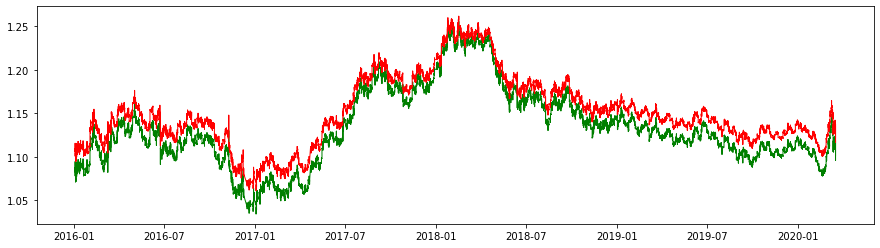

In [ ]:
f = plt.figure()
f.set_figwidth(15)
plt.plot(df_test.index,Y_test,color='green',linewidth=1)
plt.plot(df_test.index,Y_pred,color='red',linewidth=1)
plt.show()

In [ ]:
#Validazione sul giorno 18 marzo
df = pd.read_csv('eurusd_minute.csv')
df["timestamp"]=df['Date'].astype(str) +" "+ df["Time"].astype(str)
df=df.drop(axis=1,labels="Date")
df=df.drop(axis=1,labels="Time")
df.set_index("timestamp",drop=True,inplace=True)
df.index = pd.to_datetime(df.index,format="%Y-%m-%d %H:%M")
df.sort_values(by=['timestamp'], inplace = True)

df_test=df.loc['2020-03-18 00:00':'2020-03-18 22:00'] #GIORNO SUL QUALE HO FATTO LA VALIDAZIONE
df_test=df_test.sort_index(axis=1)
Y_validation=df_test["BC"].values
X_validation=df_test.drop("BC", axis=1).values

In [ ]:
Y_pred = pipe.predict(X_validation)
Y_pred=np.round(Y_pred,4) #la coppia EURUSD prende solo 4 cifre decimali
errore = mean_squared_error(Y_validation, Y_pred)
print("Errore:", errore)
punteggio = r2_score(Y_validation, Y_pred)
print("Score:", punteggio) 

Errore: 0.00045133620237547905
Score: -8.802825756019315


<Figure size 432x288 with 0 Axes>

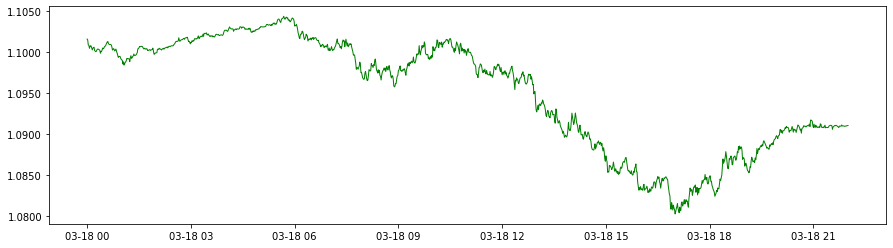

In [ ]:
from matplotlib.ticker import FormatStrFormatter
f = plt.figure()
fig,ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_figwidth(15)
plt.plot(df_test.index,Y_validation[:len(df_test.index)],color='green',linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

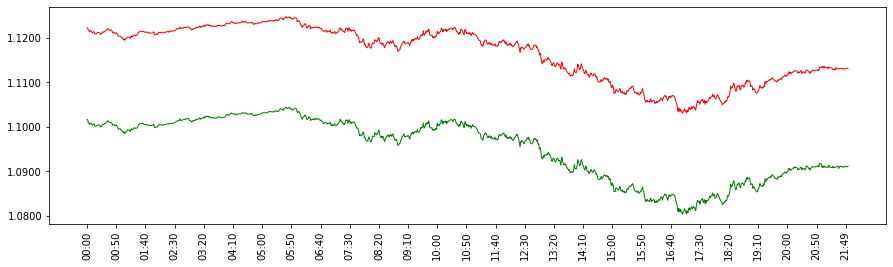

In [ ]:
f = plt.figure()

fig,ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.set_figwidth(15)
labels = df_test.index.strftime('%H:%M')
plt.plot(labels,Y_validation[:len(labels)],color='green',linewidth=1)
plt.plot(labels,Y_pred[:len(labels)],color='red',linewidth=1)
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(labels), 50))
plt.show()